<a href="https://colab.research.google.com/github/Dipika591/Basic_Python/blob/main/kmeans_clustering_updated_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
import numpy as np


In [7]:
X = np.random.uniform(0,1,1000)
Y = np.random.uniform(0,1,1000)
X

array([9.44513724e-01, 8.05955980e-01, 5.97062460e-01, 7.77889593e-01,
       4.18784251e-01, 2.27714381e-01, 5.87578720e-01, 4.50113074e-01,
       1.95494779e-01, 5.08182005e-01, 3.34170961e-01, 1.00005755e-01,
       7.67317722e-01, 3.79004712e-01, 8.18206654e-01, 7.05848751e-01,
       3.34735886e-01, 3.47285974e-01, 9.42139108e-01, 7.74109351e-01,
       4.72521505e-01, 8.84041036e-01, 8.36489757e-01, 9.60760457e-01,
       8.98532363e-01, 2.29428080e-01, 8.50479090e-01, 8.04023064e-01,
       9.79667538e-01, 7.89170669e-01, 8.78635553e-01, 3.60205006e-01,
       6.90972015e-02, 5.27093748e-01, 3.26685929e-01, 1.74462649e-01,
       2.62222124e-01, 2.34822097e-02, 5.31063400e-01, 9.33136531e-01,
       2.38106498e-01, 1.16007094e-01, 1.36403852e-01, 3.21585379e-01,
       4.77048110e-01, 3.59651332e-01, 2.68625276e-02, 3.91911268e-01,
       1.07496813e-01, 7.98030787e-03, 2.46592360e-01, 6.30015647e-01,
       1.66293482e-01, 8.94359611e-01, 6.47402680e-01, 8.01706525e-01,
      

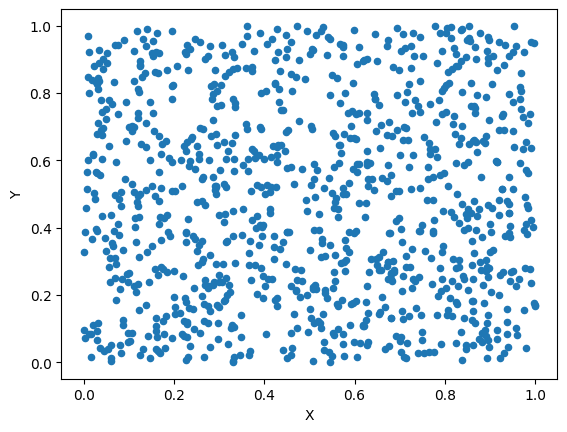

In [8]:
df_xy =pd.DataFrame(columns=["X","Y"])
df_xy
df_xy.X = X
df_xy.Y = Y
df_xy
df_xy.plot(x="X",y = "Y",kind="scatter")
model1 = KMeans(n_clusters=5).fit(df_xy)



<Axes: xlabel='X', ylabel='Y'>

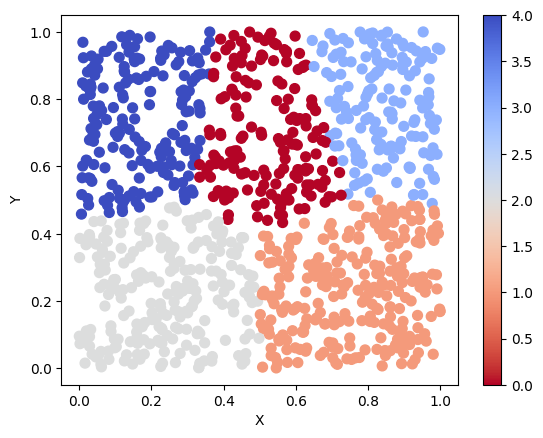

In [9]:
df_xy.plot(x="X",y = "Y",c=model1.labels_,kind="scatter",s=50,cmap=plt.cm.coolwarm_r)

In [10]:
Univ = pd.read_csv("Universities_Clustering.csv")
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


In [11]:
def norm_func(i):
    x = (i-i.min()) / (i.max() - i.min())
    return (x)

In [12]:
df_norm = norm_func(Univ.iloc[:,1:])

In [13]:
df_norm.head(10)  # Top 10 rows


,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667
5,0.817073,0.847222,0.118421,0.210526,0.427512,0.933333
6,0.756098,0.861111,0.210526,0.315789,0.416996,0.933333
7,0.609756,0.638889,0.131579,0.315789,0.208161,0.833333
8,0.963415,0.875000,0.000000,0.263158,0.561699,1.000000
9,0.731707,0.652778,0.394737,0.052632,0.910991,0.666667


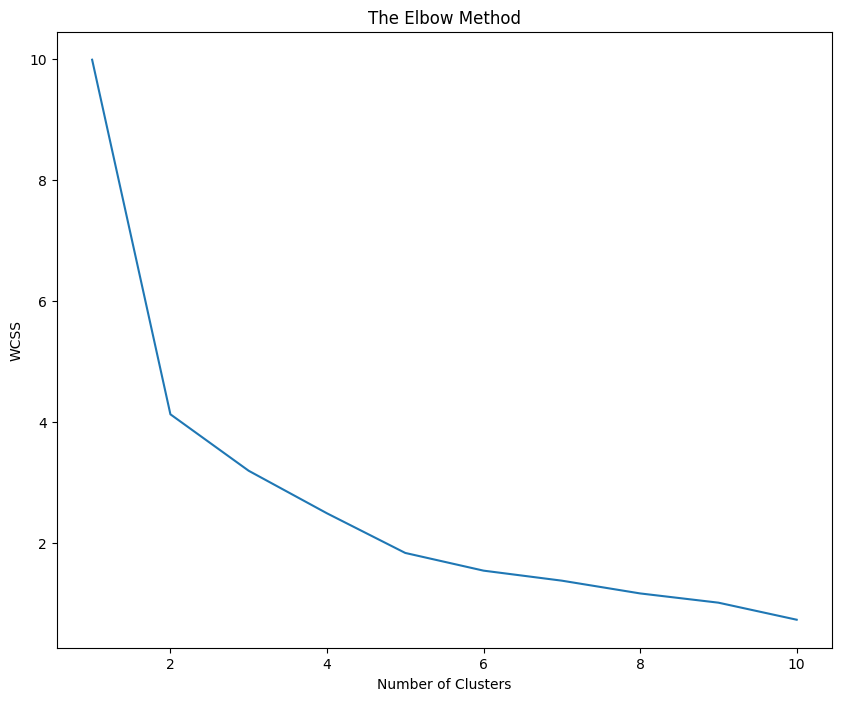

In [14]:
from sklearn.cluster import KMeans
fig = plt.figure(figsize=(10, 8))
WCSS = []
for i in range(1, 11):
    clf = KMeans(n_clusters=i)
    clf.fit(df_norm)
    WCSS.append(clf.inertia_) # inertia is another name for WCSS
plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show()

In [15]:
clf = KMeans(n_clusters=5)
y_kmeans = clf.fit_predict(df_norm)

In [16]:
y_kmeans
#clf.cluster_centers_
clf.labels_

array([1, 3, 2, 1, 1, 4, 4, 1, 4, 3, 4, 1, 0, 2, 4, 2, 4, 2, 0, 1, 0, 1,
       0, 2, 4], dtype=int32)

In [17]:
y_kmeans

array([1, 3, 2, 1, 1, 4, 4, 1, 4, 3, 4, 1, 0, 2, 4, 2, 4, 2, 0, 1, 0, 1,
       0, 2, 4], dtype=int32)

In [18]:
clf.cluster_centers_

array([[0.53658537, 0.71527778, 0.45394737, 0.47368421, 0.11055476,
        0.675     ],
       [0.68118467, 0.72619048, 0.2443609 , 0.32330827, 0.33653218,
        0.76666667],
       [0.23463415, 0.21388889, 0.70789474, 0.58947368, 0.07770225,
        0.16      ],
       [0.86585366, 0.82638889, 0.26973684, 0.02631579, 0.95549562,
        0.56666667],
       [0.87456446, 0.88095238, 0.09774436, 0.2406015 , 0.48789238,
        0.91904762]])

In [19]:
clf.inertia_

2.053847423346146

In [20]:
md=pd.Series(y_kmeans)  # converting numpy array into pandas series object
Univ['clust']=md # creating a  new column and assigning it to new column
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clust
0,Brown,1310,89,22,13,22704,94,1
1,CalTech,1415,100,25,6,63575,81,3
2,CMU,1260,62,59,9,25026,72,2
3,Columbia,1310,76,24,12,31510,88,1
4,Cornell,1280,83,33,13,21864,90,1
5,Dartmouth,1340,89,23,10,32162,95,4
6,Duke,1315,90,30,12,31585,95,4
7,Georgetown,1255,74,24,12,20126,92,1
8,Harvard,1400,91,14,11,39525,97,4
9,JohnsHopkins,1305,75,44,7,58691,87,3


In [21]:
Univ.iloc[:,1:7].groupby(Univ.clust).mean()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
clust,,,,,,
0,1225.000000,79.500000,48.500000,15.000000,14770.250000,87.250000
1,1284.285714,80.285714,32.571429,12.142857,27169.857143,90.000000
2,1101.200000,43.400000,67.800000,17.200000,12967.600000,71.800000
3,1360.000000,87.500000,34.500000,6.500000,61133.000000,84.000000
4,1363.571429,91.428571,21.428571,10.571429,35475.142857,94.571429


In [22]:
plt.style.use(['classic'])
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


Text(0.5, 1.0, 'Clusters using KMeans')

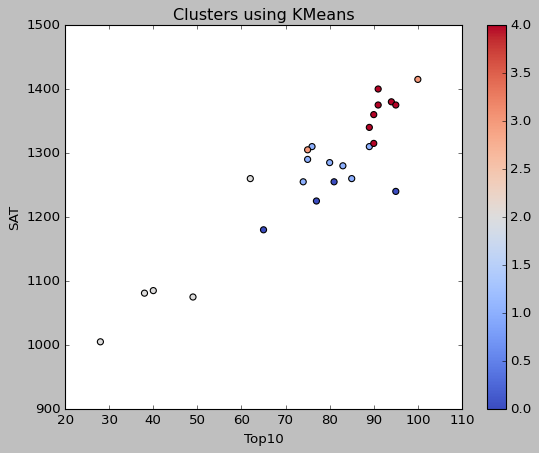

In [23]:
Univ.plot(x="Top10",y ="SAT",c=clf.labels_,kind="scatter",s=30 ,cmap=plt.cm.coolwarm)
plt.title('Clusters using KMeans')

In [24]:
WCSS

[9.988235196638557,
 4.123452442397181,
 3.1894984355997553,
 2.4858859914752838,
 1.83040917220182,
 1.537617951858704,
 1.3718628088157765,
 1.1608308180411546,
 1.007962378617659,
 0.7258743396182318]